In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

#Other libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()


## Finance crisis up to early 2016.


**Visualizing the use data optaine from google finance. 
Second data capstone project for my Udemy Data Science and ML Bootcamp, 
by Jose Portilla, Udemy.**

https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp

**Don't expect much, it is just meant to practice my visualization and pandas skills.
**





## Data

**We will get stock information for the following banks:**

    Bank of America BAC
    CitiGroup C
    Goldman Sachs GS
    JPMorgan Chase JPM
    Morgan Stanley MS
    Wells Fargo WF

**I will be using stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks.**


In [3]:
bank_stocks = pd.read_pickle('all_banks') 
bank_stocks.head()


Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

**Documentation on [Multi-Level](http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) Indexing and  [Using .xs](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html). **

** What is the max Close price for each bank's stock throughout the time period?**

In [4]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').head(3)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50


In [5]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** DataFrame returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} $$

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
returns = pd.DataFrame()

for x in tickers:
    returns[x + ' Return'] = bank_stocks.xs('Close',axis=1,level=1)[x].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


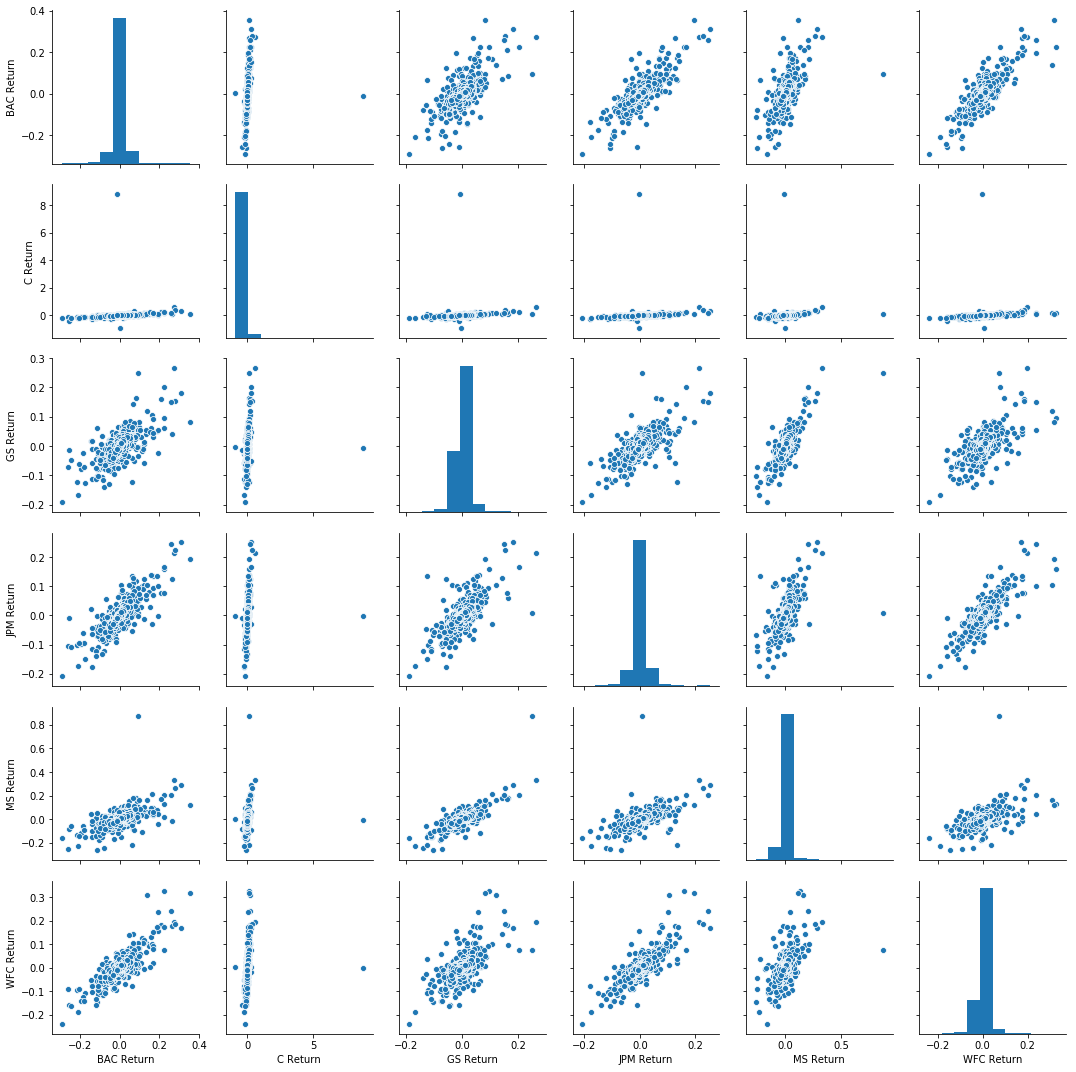

In [7]:
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [8]:
# Worst Drop of returns (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [9]:
# Best Drop of returns (4 of them on Inauguration day)
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Standard deviation of the returns, which stock would it classify as the riskiest over the entire time period? Which would it classify as the riskiest for the year 2015?**

In [10]:
# Citigroup riskiest
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [11]:
returns.loc['2015-01-01':'2015-12-31'].std() 

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [12]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015/2008 returns for Morgan Stanley **

/Users/rene/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



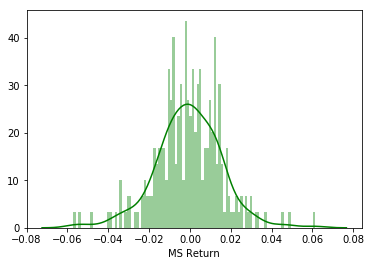

In [13]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

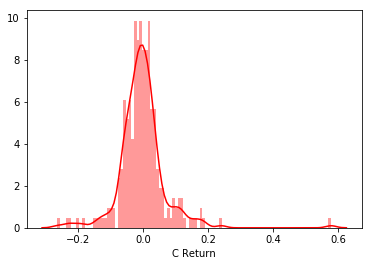

In [14]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [15]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
bank_stocks.xs('Close',axis=1,level=1).iplot()

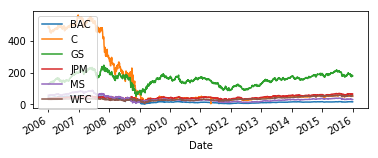

In [16]:
# This same plot can be done with a for loop
import matplotlib.pyplot as plt
for tick in tickers:
     bank_stocks[tick]['Close'].plot(label=tick,figsize=(6,2))
plt.legend()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008.

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**


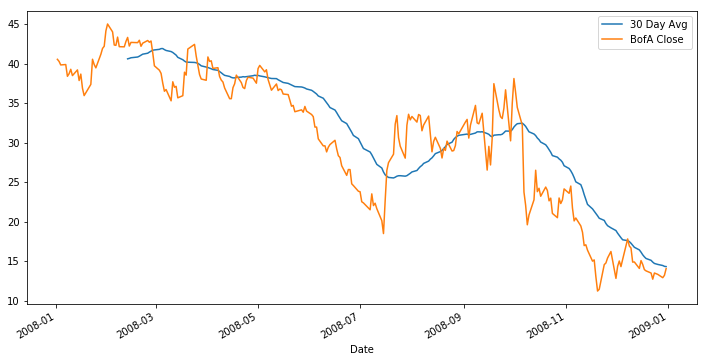

In [17]:

rolling_avg = pd.DataFrame()
rolling_avg['30 Day Avg'] = bank_stocks.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC'].rolling(window=30).mean()

rolling_avg['30 Day Avg'].plot(figsize=(12,6),label='30 Day Avg')
bank_stocks.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC'].plot(figsize=(12,6),label='BofA Close')
plt.legend()


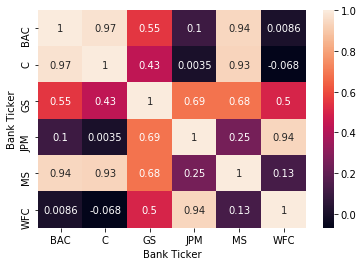

In [18]:
sns.heatmap(bank_stocks.xs('Close',axis=1,level=1).corr(),annot=True)

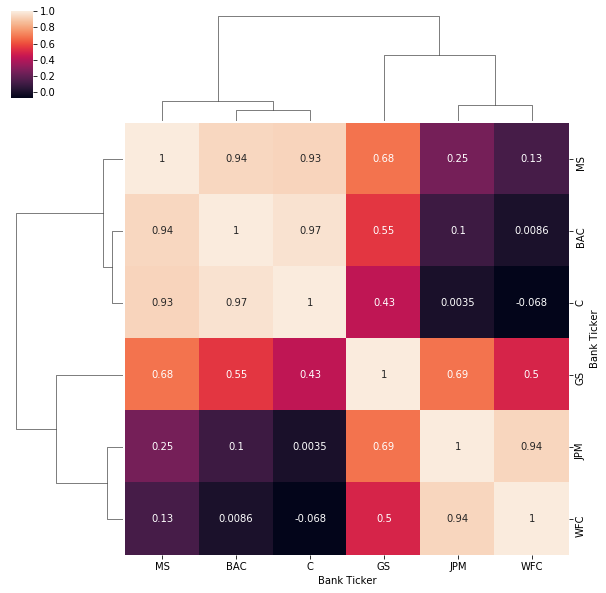

In [19]:
sns.clustermap(bank_stocks.xs('Close',axis=1,level=1).corr(),annot=True)